In [95]:
import pandas as pd

In [96]:
dataset = pd.read_csv('household_power_consumption.txt', sep = ';', low_memory = False)

## 1.

In [97]:
dataset.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## 3.

In [98]:
dataset.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


## 4.

In [99]:
dataset['Datetime'] = pd.to_datetime(dataset['Date'] + ' ' + dataset['Time'], format='%d/%m/%Y %H:%M:%S')
dataset['Day_of_week'] = dataset['Datetime'].dt.dayofweek
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00,5
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00,5
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00,5
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00,5
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00,5


In [100]:
dataset['Month'] = dataset['Datetime'].dt.month
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00,5,12
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00,5,12
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00,5,12
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00,5,12
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00,5,12


## 5.

In [101]:
import pandas as pd

dataset_2007 = dataset[dataset['Datetime'].dt.year == 2007].copy()

dataset_2007['Global_active_power'] = pd.to_numeric(dataset_2007['Global_active_power'], errors='coerce')
daily_avg_power_2007 = dataset_2007.set_index('Datetime')['Global_active_power'].resample('D').mean()

print("Média de consumo diário de Global_active_power em 2007:")
display(daily_avg_power_2007.head())

Média de consumo diário de Global_active_power em 2007:


,Global_active_power
Datetime,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


## 6.

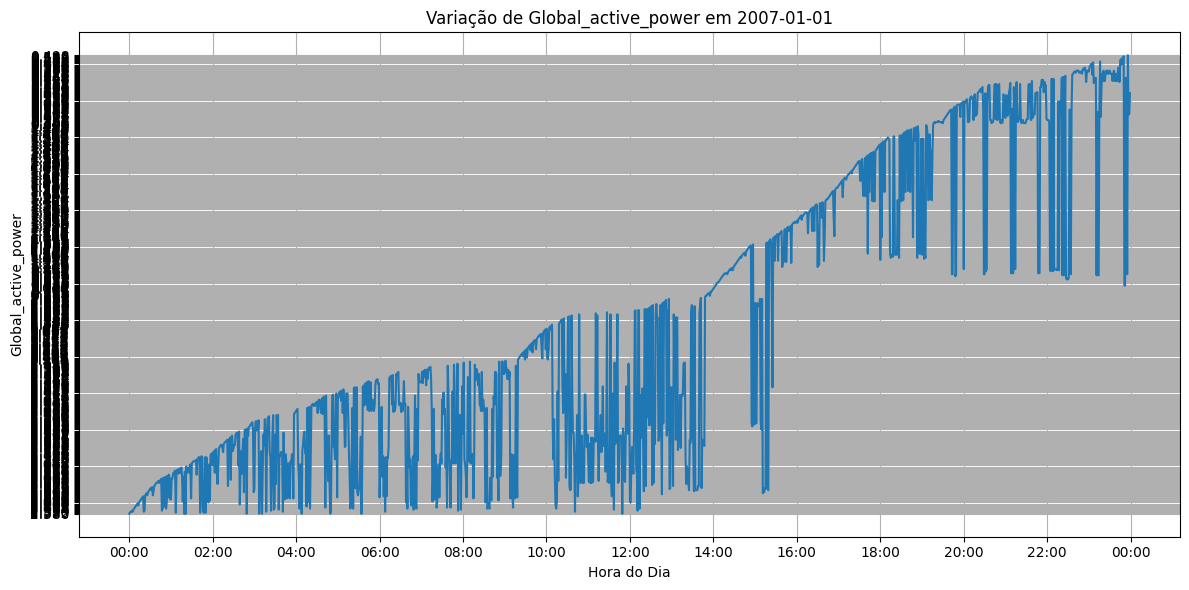

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


date_to_plot = '2007-01-01'


dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])
daily_power_data = dataset[dataset['Datetime'].dt.date == pd.to_datetime(date_to_plot).date()]


if daily_power_data.empty:
    print(f"No data available for {date_to_plot}")
else:
    plt.figure(figsize=(12, 6))
    plt.plot(daily_power_data['Datetime'], daily_power_data['Global_active_power'])
    plt.title(f'Variação de Global_active_power em {date_to_plot}')
    plt.xlabel('Hora do Dia')
    plt.ylabel('Global_active_power')


    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 7.

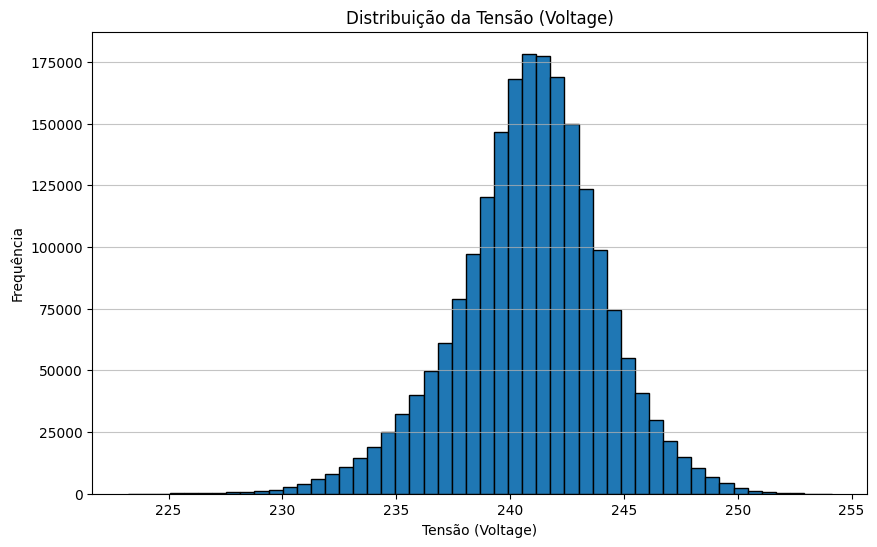

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

dataset['Voltage'] = pd.to_numeric(dataset['Voltage'], errors='coerce')

dataset_cleaned_voltage = dataset.dropna(subset=['Voltage']).copy()

plt.figure(figsize=(10, 6))
plt.hist(dataset_cleaned_voltage['Voltage'], bins=50, edgecolor='black')
plt.title('Distribuição da Tensão (Voltage)')
plt.xlabel('Tensão (Voltage)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

Analisando o gráfico é possivel ver que a tensão se concentra entre 240-245 voltagens. O gráfico se concentra no meio e as extremidades ficam com os valores mais baixos ou mais altos

## 8.

In [104]:
import pandas as pd

dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')
monthly_avg_global_power = dataset.groupby('Month')['Global_active_power'].mean()

print("Consumo médio de Global_active_power por mês:")
display(monthly_avg_global_power)

Consumo médio de Global_active_power por mês:


,Global_active_power
Month,
1,1.462226
2,1.300431
3,1.231343
4,1.047146
5,1.029571
6,0.909148
7,0.700359
8,0.572812
9,0.975653


## 9.

In [105]:
import pandas as pd

dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])
dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')


dataset_indexed = dataset.set_index('Datetime')

daily_avg_power = dataset_indexed['Global_active_power'].resample('D').mean()


day_with_max_consumption = daily_avg_power.idxmax()
max_consumption_value = daily_avg_power.max()

print(f"O dia com o maior consumo médio de Global_active_power é: {day_with_max_consumption.date()}")
print(f"O consumo médio nesse dia foi: {max_consumption_value:.4f}")

O dia com o maior consumo médio de Global_active_power é: 2006-12-23
O consumo médio nesse dia foi: 3.3149


## 10.

In [106]:
import pandas as pd


def categorize_day(day_of_week):
    if day_of_week < 5:
        return 'Weekday'
    else:
        return 'Weekend'

dataset['Day_type'] = dataset['Day_of_week'].apply(categorize_day)

dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')


average_consumption_by_day_type = dataset.groupby('Day_type')['Global_active_power'].mean()

print("Consumo médio de Global_active_power em dias de semana vs fim de semana:")
display(average_consumption_by_day_type)

Consumo médio de Global_active_power em dias de semana vs fim de semana:


,Global_active_power
Day_type,
Weekday,1.035472
Weekend,1.234232


## 11.

In [107]:
import pandas as pd

correlation_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
correlation_df = dataset[correlation_cols].copy()


for col in correlation_cols:
    correlation_df[col] = pd.to_numeric(correlation_df[col], errors='coerce')


correlation_df.dropna(inplace=True)


correlation_matrix = correlation_df.corr()

print("Matriz de Correlação:")
display(correlation_matrix)

Matriz de Correlação:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


## 12.

In [108]:

dataset['Sub_metering_1'] = pd.to_numeric(dataset['Sub_metering_1'], errors='coerce')
dataset['Sub_metering_2'] = pd.to_numeric(dataset['Sub_metering_2'], errors='coerce')
dataset['Sub_metering_3'] = pd.to_numeric(dataset['Sub_metering_3'], errors='coerce')

total_sub_metering = dataset['Sub_metering_1'] + dataset['Sub_metering_2'] + dataset['Sub_metering_3']

print("Total sub-metering values stored in a variable:")
display(total_sub_metering.head())

Total sub-metering values stored in a variable:


,0
0,18.0
1,17.0
2,19.0
3,18.0
4,18.0


## 13.

In [109]:


if 'Month' not in dataset.columns:
    dataset['Month'] = dataset['Datetime'].dt.month

dataset['Sub_metering_1'] = pd.to_numeric(dataset['Sub_metering_1'], errors='coerce')
dataset['Sub_metering_2'] = pd.to_numeric(dataset['Sub_metering_2'], errors='coerce')
dataset['Sub_metering_3'] = pd.to_numeric(dataset['Sub_metering_3'], errors='coerce')
dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')



dataset['_temp_total_sub_metering'] = dataset['Sub_metering_1'] + dataset['Sub_metering_2'] + dataset['Sub_metering_3']



monthly_avg_total_sub_metering = dataset.groupby('Month')['_temp_total_sub_metering'].mean()


dataset.drop(columns=['_temp_total_sub_metering'], inplace=True)

print("Comparando Consumo Médio Mensal (Total Sub-metering vs Global Active Power):")


for month in monthly_avg_total_sub_metering.index:
    avg_sub = monthly_avg_total_sub_metering.loc[month]

    if month in monthly_avg_global_power.index:
        avg_global = monthly_avg_global_power.loc[month]

        if avg_sub > avg_global:
            print(f"Mês {month}: Total Sub-metering ({avg_sub:.2f}) ultrapassa Global Active Power ({avg_global:.2f}).")
        else:
             print(f"Mês {month}: Total Sub-metering ({avg_sub:.2f}) NÃO ultrapassa Global Active Power ({avg_global:.2f}).")
    else:
        print(f"Mês {month}: Média Global Active Power não disponível.")

Comparando Consumo Médio Mensal (Total Sub-metering vs Global Active Power):
Mês 1: Total Sub-metering (10.75) ultrapassa Global Active Power (1.46).
Mês 2: Total Sub-metering (10.11) ultrapassa Global Active Power (1.30).
Mês 3: Total Sub-metering (9.86) ultrapassa Global Active Power (1.23).
Mês 4: Total Sub-metering (8.93) ultrapassa Global Active Power (1.05).
Mês 5: Total Sub-metering (9.24) ultrapassa Global Active Power (1.03).
Mês 6: Total Sub-metering (8.75) ultrapassa Global Active Power (0.91).
Mês 7: Total Sub-metering (5.98) ultrapassa Global Active Power (0.70).
Mês 8: Total Sub-metering (5.17) ultrapassa Global Active Power (0.57).
Mês 9: Total Sub-metering (8.70) ultrapassa Global Active Power (0.98).
Mês 10: Total Sub-metering (9.13) ultrapassa Global Active Power (1.14).
Mês 11: Total Sub-metering (9.61) ultrapassa Global Active Power (1.29).
Mês 12: Total Sub-metering (10.56) ultrapassa Global Active Power (1.49).


## 14.

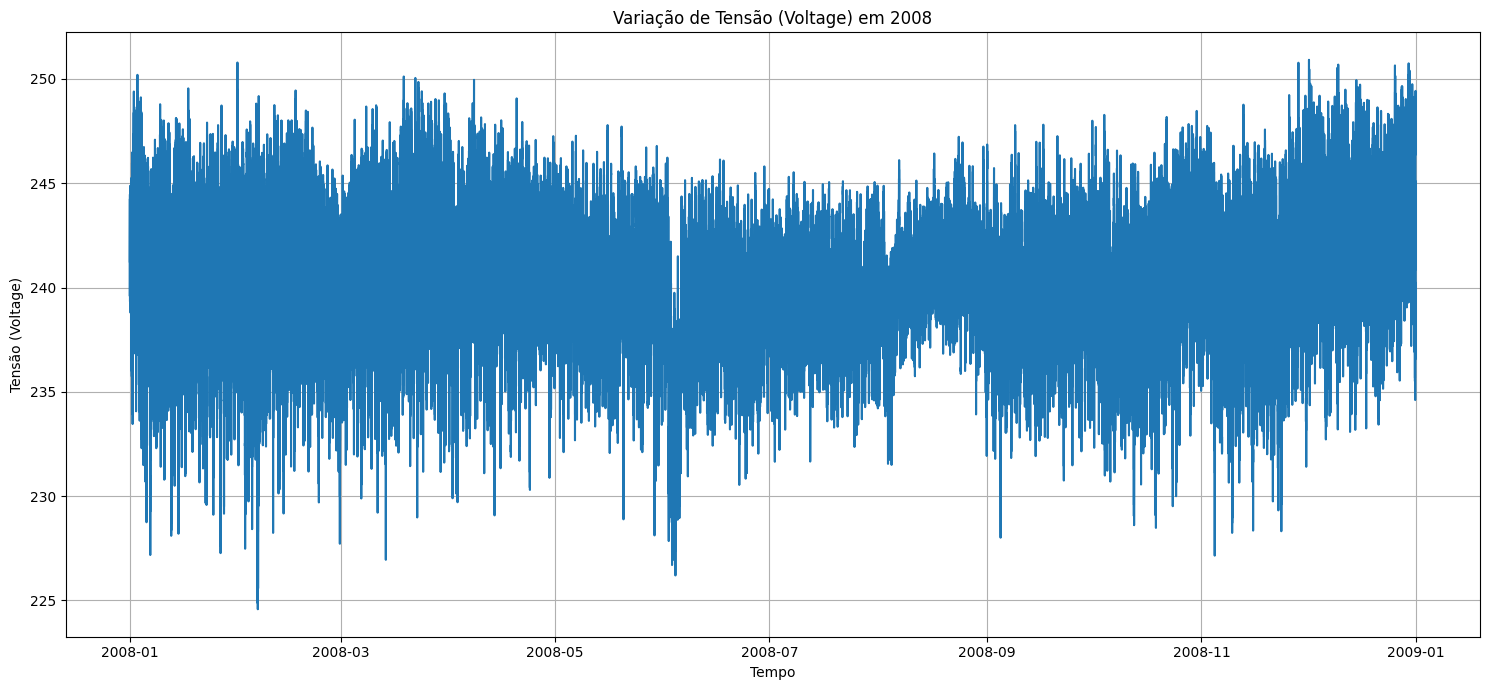

In [110]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for the year 2008
dataset_2008 = dataset[dataset['Datetime'].dt.year == 2008].copy()

# Ensure 'Voltage' column is numeric, coercing errors
dataset_2008['Voltage'] = pd.to_numeric(dataset_2008['Voltage'], errors='coerce')

# Drop rows with NaN 'Voltage' for plotting
dataset_2008_cleaned = dataset_2008.dropna(subset=['Voltage'])


# Create the time series plot for Voltage in 2008
plt.figure(figsize=(15, 7))
plt.plot(dataset_2008_cleaned['Datetime'], dataset_2008_cleaned['Voltage'])
plt.title('Variação de Tensão (Voltage) em 2008')
plt.xlabel('Tempo')
plt.ylabel('Tensão (Voltage)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 15.

In [111]:

summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

if 'Month' not in dataset.columns:
    dataset['Month'] = dataset['Datetime'].dt.month


dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')


summer_data = dataset[dataset['Month'].isin(summer_months)].copy()
winter_data = dataset[dataset['Month'].isin(winter_months)].copy()

average_summer_consumption = summer_data['Global_active_power'].mean()
average_winter_consumption = winter_data['Global_active_power'].mean()

print("Comparação de Consumo Médio de Global_active_power (Hemisfério Norte):")
print(f"Média no Verão (Junho, Julho, Agosto): {average_summer_consumption:.4f}")
print(f"Média no Inverno (Dezembro, Janeiro, Fevereiro): {average_winter_consumption:.4f}")
if average_summer_consumption > average_winter_consumption:
    print("O consumo médio é maior no Verão.")
elif average_winter_consumption > average_summer_consumption:
    print("O consumo médio é maior no Inverno.")
else:
    print("O consumo médio é aproximadamente o mesmo no Verão e Inverno.")

Comparação de Consumo Médio de Global_active_power (Hemisfério Norte):
Média no Verão (Junho, Julho, Agosto): 0.7267
Média no Inverno (Dezembro, Janeiro, Fevereiro): 1.4176
O consumo médio é maior no Inverno.


## 16.

In [112]:

dataset_sampled = dataset.sample(frac=0.01, random_state=42).copy()

print("Amostragem de 1% dos dados:")
display(dataset_sampled.head())

Amostragem de 1% dos dados:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month,Day_type
1870606,7/7/2010,18:10:00,0.256,0.106,242.00,1.200,0.0,0.0,1.0,2010-07-07 18:10:00,2,7,Weekday
213926,14/5/2007,06:50:00,0.466,0.352,237.22,2.400,0.0,2.0,0.0,2007-05-14 06:50:00,0,5,Weekday
409006,26/9/2007,18:10:00,0.758,0.194,238.66,3.200,0.0,1.0,0.0,2007-09-26 18:10:00,2,9,Weekday
265806,19/6/2007,07:30:00,1.290,0.046,240.64,5.400,1.0,0.0,18.0,2007-06-19 07:30:00,1,6,Weekday
1786279,10/5/2010,04:43:00,0.428,0.202,242.23,1.800,0.0,2.0,1.0,2010-05-10 04:43:00,0,5,Weekday


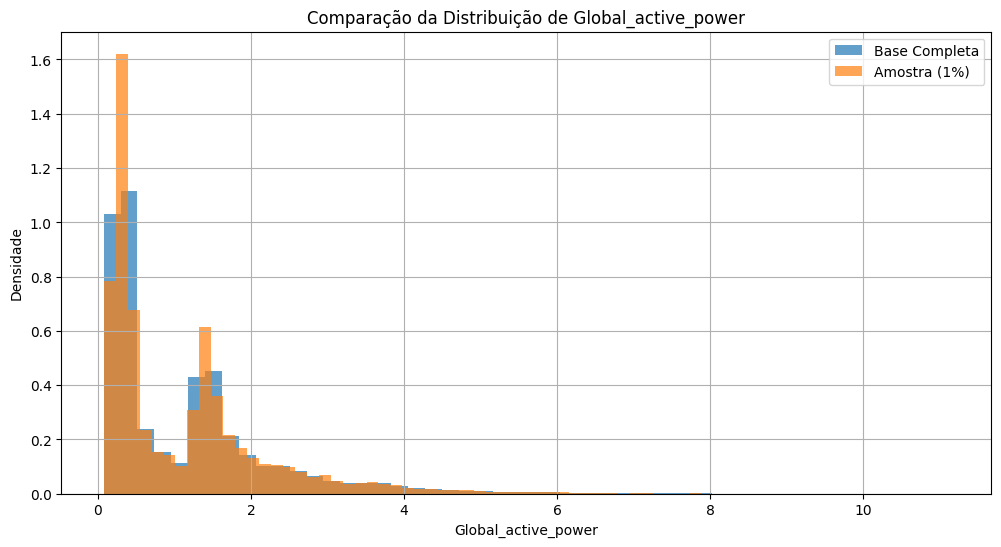

In [113]:

dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')
dataset_sampled['Global_active_power'] = pd.to_numeric(dataset_sampled['Global_active_power'], errors='coerce')


dataset_cleaned_full = dataset.dropna(subset=['Global_active_power'])
dataset_cleaned_sampled = dataset_sampled.dropna(subset=['Global_active_power'])


plt.figure(figsize=(12, 6))

plt.hist(dataset_cleaned_full['Global_active_power'], bins=50, alpha=0.7, label='Base Completa', density=True)
plt.hist(dataset_cleaned_sampled['Global_active_power'], bins=50, alpha=0.7, label='Amostra (1%)', density=True)


plt.title('Comparação da Distribuição de Global_active_power')
plt.xlabel('Global_active_power')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

## 17.

In [114]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


for col in numerical_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

dataset_cleaned_for_scaling = dataset.dropna(subset=numerical_cols).copy()

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(dataset_cleaned_for_scaling[numerical_cols])

scaled_df = pd.DataFrame(scaled_data, columns=[col + '_scaled' for col in numerical_cols], index=dataset_cleaned_for_scaling.index)

dataset_scaled = pd.concat([dataset_cleaned_for_scaling, scaled_df], axis=1)

print("Dataset with Min-Max Scaled variables:")
display(dataset_scaled.head())

Dataset with Min-Max Scaled variables:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month,Day_type,Global_active_power_scaled,Global_reactive_power_scaled,Voltage_scaled,Global_intensity_scaled,Sub_metering_1_scaled,Sub_metering_2_scaled,Sub_metering_3_scaled
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,5,12,Weekend,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,5,12,Weekend,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,5,12,Weekend,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,5,12,Weekend,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,5,12,Weekend,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387


## 18.

In [115]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')

dataset_cleaned = dataset.dropna(subset=['Global_active_power']).copy()


X = dataset_cleaned[['Global_active_power']].values
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dataset_cleaned['Cluster'] = kmeans.fit_predict(X)

print("Dataset with K-Means Clusters:")
display(dataset_cleaned.head())

Dataset with K-Means Clusters:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month,Day_type,Cluster
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,5,12,Weekend,2
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,5,12,Weekend,2
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,5,12,Weekend,2
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,5,12,Weekend,2
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,5,12,Weekend,2


Os clusters foram dividos em níveis de consumo do mais baixo para o mais alto com base no global_active_power.

O cluster número 1 é oque mais aprece e ele representa a média de consumo, oque demonstra que há um desbalanceamento na distribuição desses clusters e é possivel ver que maior parte dessas amnostras são registradas em horário de pico, oque faz sentido levando em consideração os fatores

## 19.

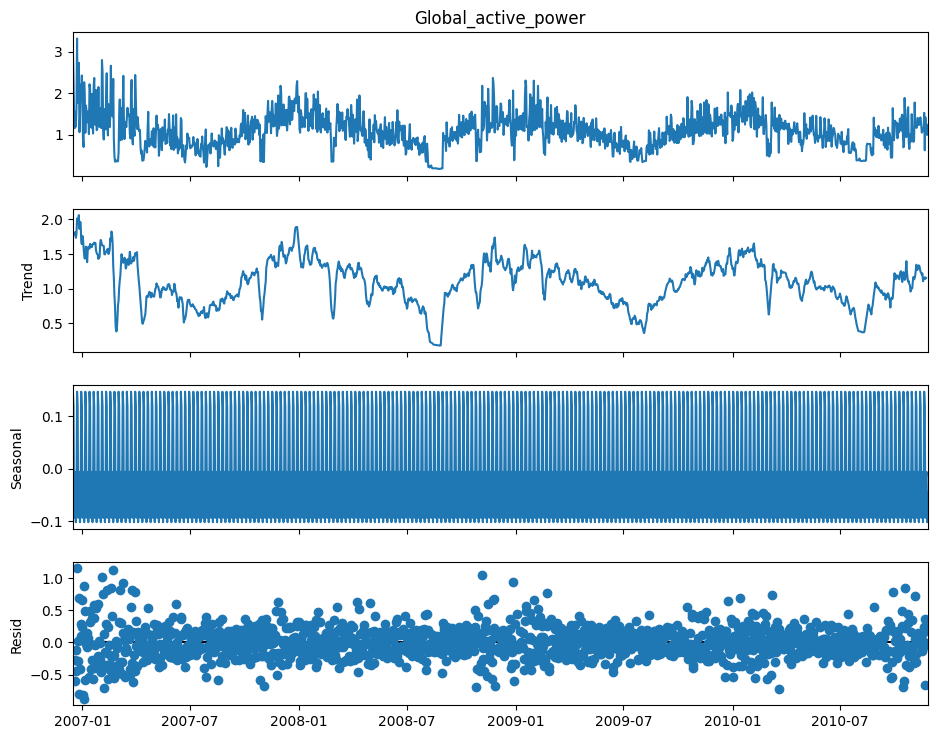

In [116]:
import statsmodels.api as sm


if 'Datetime' in dataset_cleaned.columns:
    dataset_cleaned = dataset_cleaned.set_index('Datetime')
else:

    dataset_cleaned = dataset.dropna(subset=['Global_active_power']).copy()
    dataset_cleaned = dataset_cleaned.set_index('Datetime')


daily_data = dataset_cleaned['Global_active_power'].resample('D').mean().ffill()



decomposition = sm.tsa.seasonal_decompose(daily_data, model='additive', period=7)


fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

## 20.

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset_cleaned['Global_intensity'] = pd.to_numeric(dataset_cleaned['Global_intensity'], errors='coerce')
dataset_cleaned['Global_active_power'] = pd.to_numeric(dataset_cleaned['Global_active_power'], errors='coerce')


dataset_cleaned_regression = dataset_cleaned.dropna(subset=['Global_intensity', 'Global_active_power']).copy()



X = dataset_cleaned_regression[['Global_intensity']]
y = dataset_cleaned_regression['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient (Global_intensity): {model.coef_[0]:.4f}")

Mean Squared Error: 0.0025
R-squared: 0.9978
Intercept: -0.0081
Coefficient (Global_intensity): 0.2376


O erro do meu modelo é basicamente a diferença entre o valor que ele previu e o valor real, isso a gente chama de resíduo. Eu usei o Erro Quadrático Médio (EQM) pra medir esse erro, que faz a média desses resíduos ao quadrado. Como o EQM deu praticamente zero, significa que as previsões do modelo ficaram bem próximas dos valores reais.